In [10]:
import requests, pandas as pd, numpy as np
import time, json
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_fx_data = pd.read_csv('BOE-XUDLERD.csv')
df_fx_data.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


In [5]:
df_fx_data['Date'] = pd.to_datetime(df_fx_data['Date'])
df_fx_data.columns

Index(['Date', 'Value'], dtype='object')

In [6]:
df_fx_data

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


In [7]:
indexed_df = df_fx_data.set_index('Date')
indexed_df

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608
...,...
1975-01-08,0.7554
1975-01-07,0.7510
1975-01-06,0.7524


In [8]:
ts = indexed_df['Value']
ts.head()

Date
2017-11-09    0.8603
2017-11-08    0.8631
2017-11-07    0.8639
2017-11-06    0.8631
2017-11-03    0.8608
Name: Value, dtype: float64

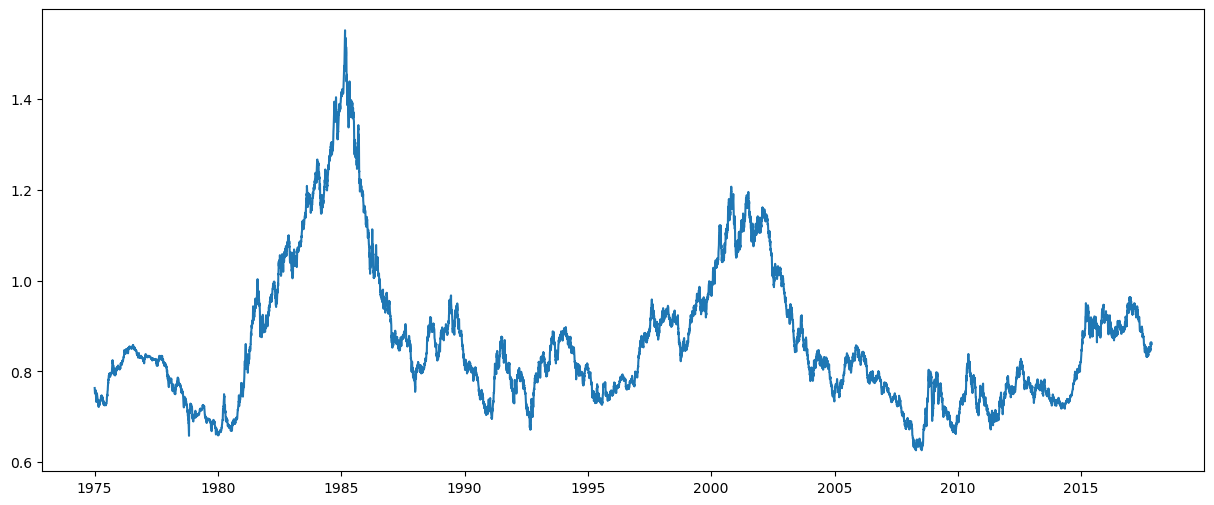

In [11]:
plt.plot(ts)

In [13]:
ts.resample('W').sum()

Date
1975-01-05    1.5218
1975-01-12    3.7673
1975-01-19    3.7773
1975-01-26    3.7194
1975-02-02    3.6951
               ...  
2017-10-15    4.2314
2017-10-22    4.2399
2017-10-29    4.2663
2017-11-05    4.2968
2017-11-12    3.4504
Freq: W-SUN, Name: Value, Length: 2237, dtype: float64

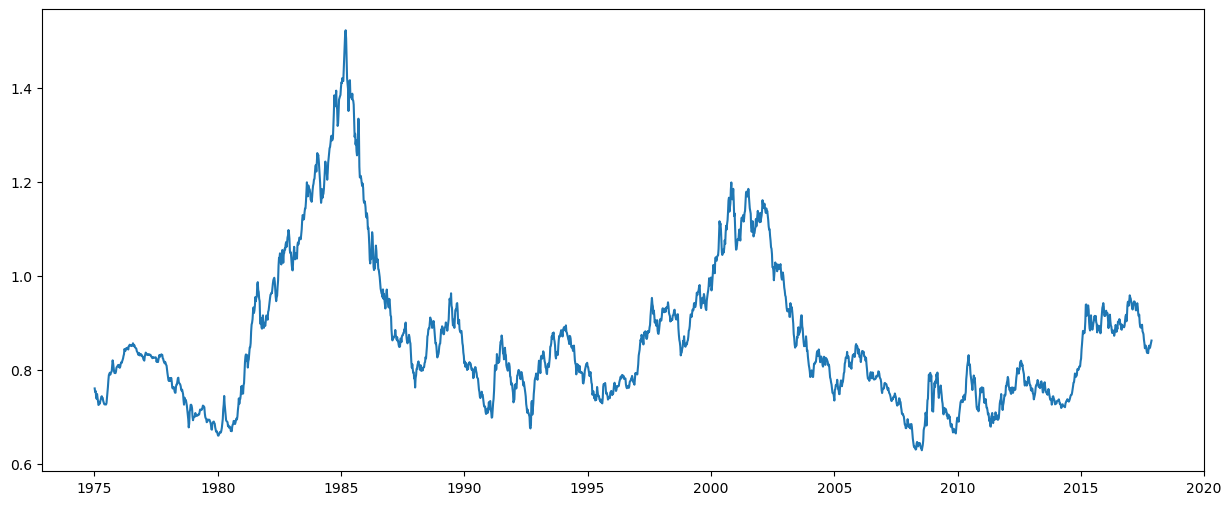

In [21]:
ts_week = ts.resample('W').mean()
plt.plot(ts_week)
plt.show()

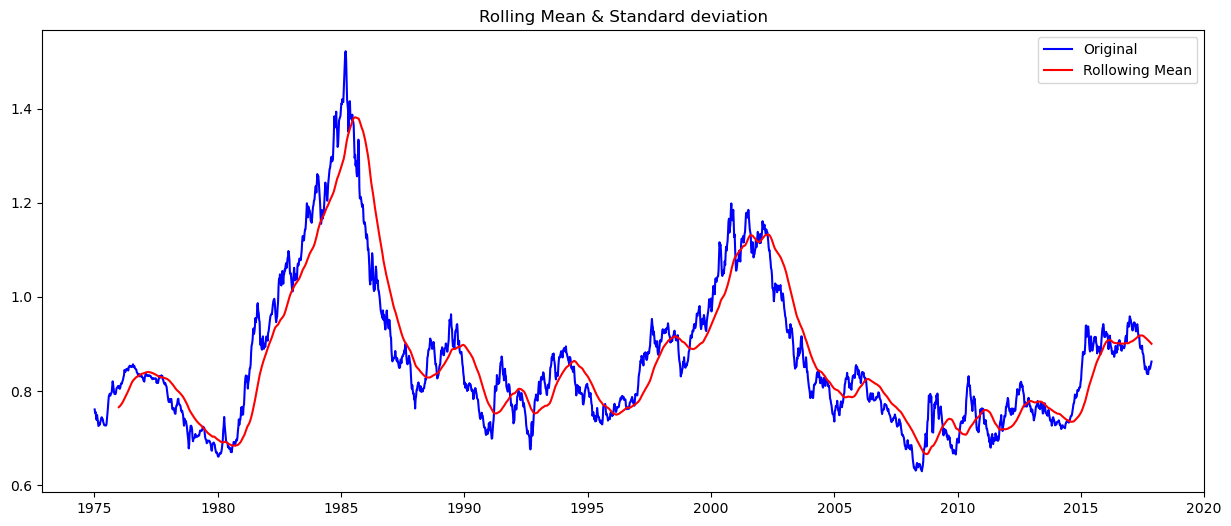

Results of Dickey fuller test:
TestStatistic                    -2.076341
p-value                           0.254134
#Lags used                        2.000000
Number of observations used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64


In [30]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

def test_stationarity(timeseries):
    #Determining rolling statistic
    rolmean = timeseries.rolling(window=52, center=False).mean()
    #rolstd = timeseries.rolling(window=52, center=False).std()
    #plot folling statistics
    origts = plt.plot(timeseries,color='blue',label='Original')
    meants = plt.plot(rolmean,color='red', label='Rollowing Mean')
    plt.legend()
    plt.title('Rolling Mean & Standard deviation')
    plt.show(block='False')
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey fuller test:")
    dftest = adfuller(timeseries, autolag='AIC')
    #print(dftest)
    dfoutput = pd.Series(dftest[0:4],index=['TestStatistic','p-value','#Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)
    
test_stationarity(ts_week)

In [31]:
ts_week.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [32]:
np.log(0.76090)

-0.27325333579965994

In [33]:
np.log(0.75346)

-0.2830793479252081

In [34]:
ts_week_log = np.log(ts_week)

In [35]:
ts_week_log

Date
1975-01-05   -0.273253
1975-01-12   -0.283079
1975-01-19   -0.280428
1975-01-26   -0.295876
1975-02-02   -0.302430
                ...   
2017-10-15   -0.166905
2017-10-22   -0.164898
2017-10-29   -0.158691
2017-11-05   -0.151567
2017-11-12   -0.147804
Freq: W-SUN, Name: Value, Length: 2237, dtype: float64

In [37]:
df_logs= pd.DataFrame()
df_logs['week']=ts_week
df_logs['week_log'] = np.log(ts_week)
df_logs['week_log_diff'] = np.log(ts_week) - np.log(ts_week).shift()

In [38]:
df_logs

,week,week_log,week_log_diff
Date,,,
1975-01-05,0.76090,-0.273253,NaN
1975-01-12,0.75346,-0.283079,-0.009826
1975-01-19,0.75546,-0.280428,0.002651
1975-01-26,0.74388,-0.295876,-0.015447
1975-02-02,0.73902,-0.302430,-0.006555
...,...,...,...
2017-10-15,0.84628,-0.166905,-0.006525
2017-10-22,0.84798,-0.164898,0.002007
2017-10-29,0.85326,-0.158691,0.006207


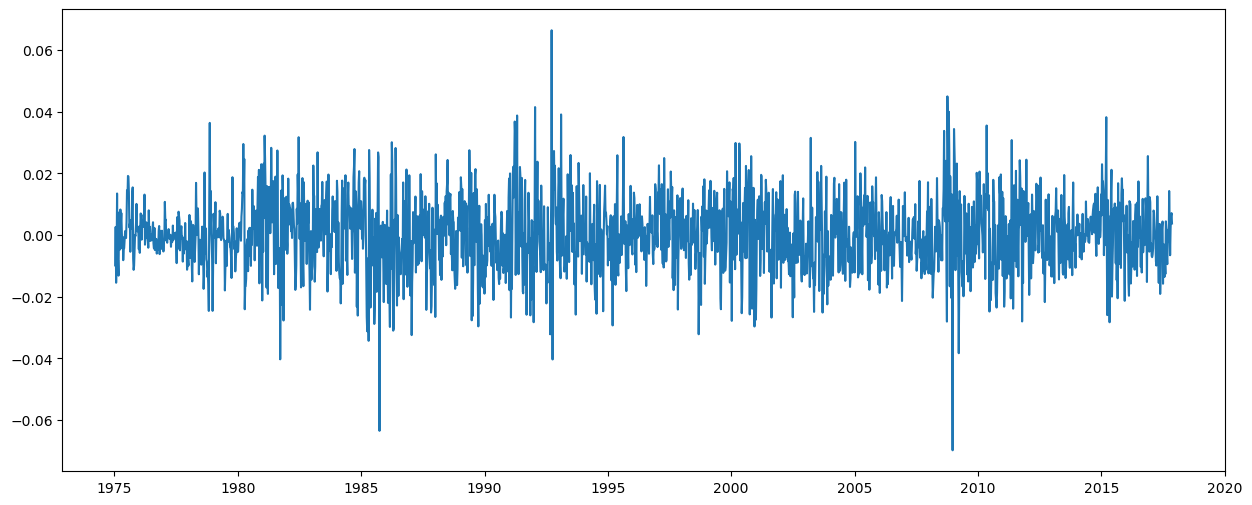

In [39]:
plt.plot(df_logs['week_log_diff'])

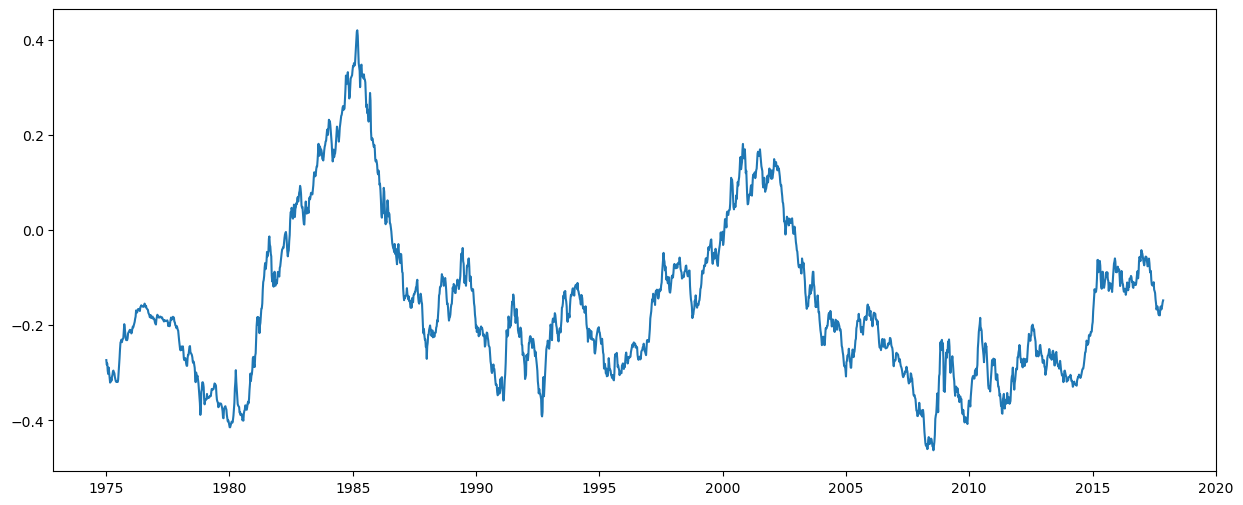

In [40]:
plt.plot(df_logs['week_log'])

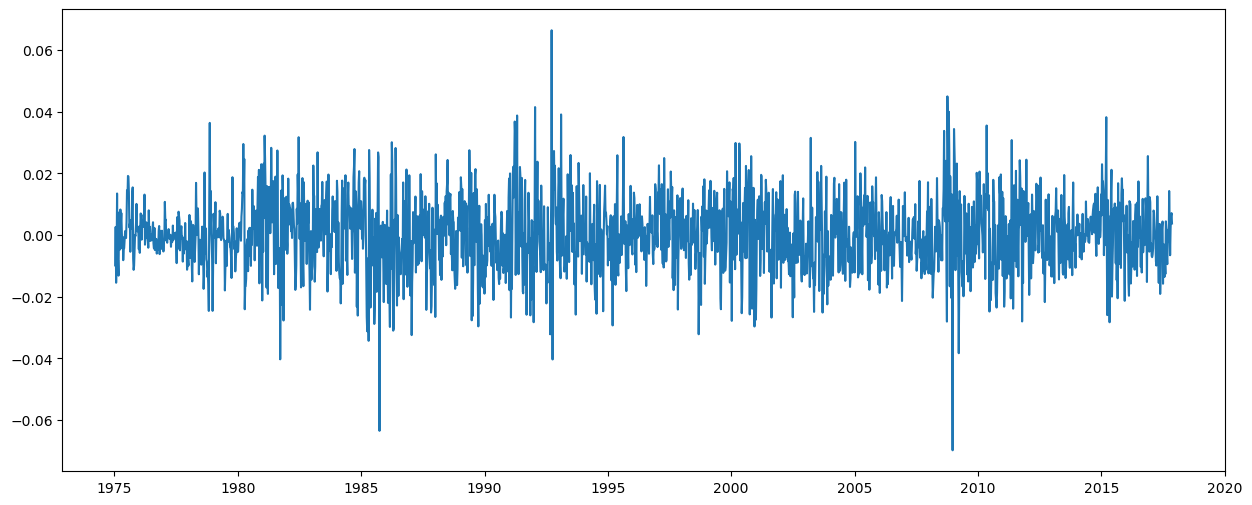

In [41]:
ts_week_log = np.log(ts_week)
ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.plot(ts_week_log_diff)

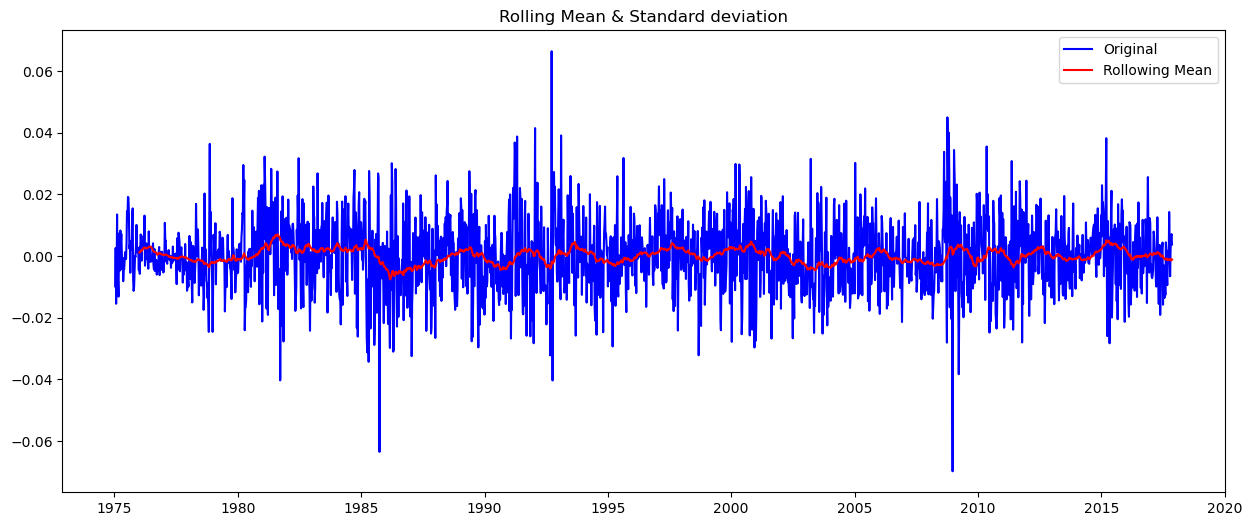

Results of Dickey fuller test:
TestStatistic                   -36.590004
p-value                           0.000000
#Lags used                        0.000000
Number of observations used    2235.000000
Critical Value (1%)              -3.433279
Critical Value (5%)              -2.862834
Critical Value (10%)             -2.567459
dtype: float64


In [43]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)

In [54]:
lag_acf = acf(ts_week_log_diff,nlags=5)
lag_pacf = pacf(ts_week_log_diff, nlags=5)

In [55]:
lag_acf

array([1.        , 0.25046862, 0.03934399, 0.02220274, 0.02007253,
       0.00431513])

In [56]:
lag_pacf

array([ 1.        ,  0.25058068, -0.02497998,  0.01962142,  0.01137797,
       -0.00394587])

Text(0.5, 1.0, 'Autocorrelation Function')

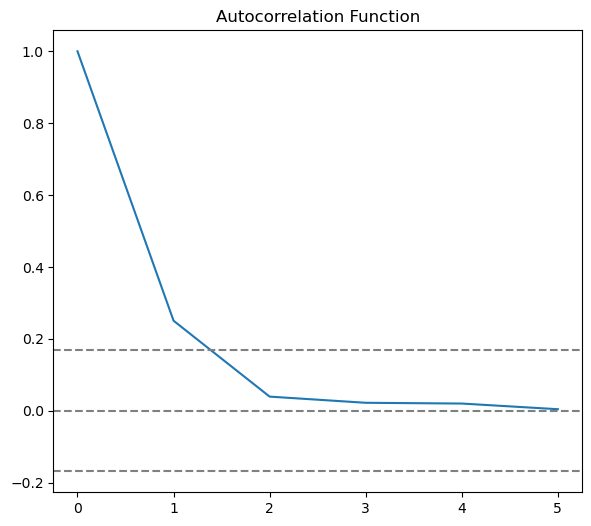

In [57]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

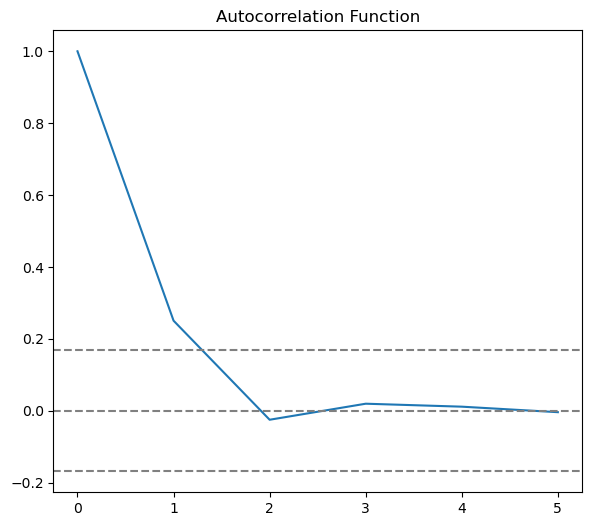

In [58]:
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_week_log, order=(2,1,1))
results_ARIMA = model.fit()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(2, 1, 1)   Log Likelihood                6869.699
Date:                Tue, 20 Dec 2022   AIC                         -13731.397
Time:                        10:02:09   BIC                         -13708.547
Sample:                    01-05-1975   HQIC                        -13723.055
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5344      0.164     -3.257      0.001      -0.856      -0.213
ar.L2          0.1729      0.053      3.258      0.001       0.069       0.277
ma.L1          0.7921      0.163      4.874      0.0

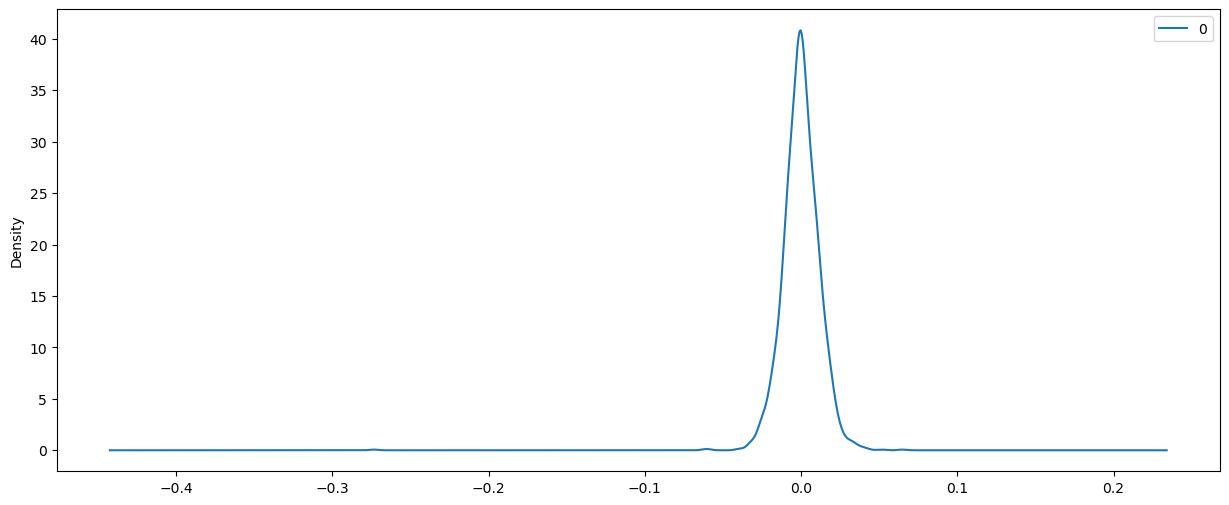

In [62]:
print(results_ARIMA.summary())
residuals =pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [120]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1975-01-05    0.000000
1975-01-12   -0.273253
1975-01-19   -0.285537
1975-01-26   -0.279503
1975-02-02   -0.300117
Freq: W-SUN, dtype: float64


In [121]:
size = int(len(ts_week_log)-30)
train,test = ts_week_log[:size], ts_week_log[size:len(ts_week_log)]
history=[x for x in train]
predictions = list()
print(train.head())
print(test.head())


Date
1975-01-05   -0.273253
1975-01-12   -0.283079
1975-01-19   -0.280428
1975-01-26   -0.295876
1975-02-02   -0.302430
Freq: W-SUN, Name: Value, dtype: float64
Date
2017-04-23   -0.069189
2017-04-30   -0.084687
2017-05-07   -0.089460
2017-05-14   -0.085841
2017-05-21   -0.104916
Freq: W-SUN, Name: Value, dtype: float64


In [122]:
print(train.tail())

Date
2017-03-19   -0.066247
2017-03-26   -0.076125
2017-04-02   -0.075651
2017-04-09   -0.063068
2017-04-16   -0.059909
Freq: W-SUN, Name: Value, dtype: float64


In [123]:
train.shape

(2207,)

In [124]:
test.shape

(30,)

In [125]:
train

Date
1975-01-05   -0.273253
1975-01-12   -0.283079
1975-01-19   -0.280428
1975-01-26   -0.295876
1975-02-02   -0.302430
                ...   
2017-03-19   -0.066247
2017-03-26   -0.076125
2017-04-02   -0.075651
2017-04-09   -0.063068
2017-04-16   -0.059909
Freq: W-SUN, Name: Value, Length: 2207, dtype: float64

In [126]:
history

[-0.2732533357996601,
 -0.2830793479252082,
 -0.2804284437404728,
 -0.29587554748030875,
 -0.3024302948006891,
 -0.2889361918642178,
 -0.299188012637983,
 -0.3073679065685497,
 -0.32050834038333115,
 -0.3192690634115928,
 -0.3118108440303757,
 -0.3165206008195089,
 -0.3082249736831103,
 -0.30425193078094587,
 -0.2971130715143841,
 -0.29533797086269636,
 -0.29967368530415894,
 -0.30026760573628175,
 -0.30840192026612107,
 -0.3130409069186711,
 -0.3172619415818973,
 -0.3190007557092081,
 -0.31770151410470376,
 -0.31833373831795864,
 -0.3192965862211228,
 -0.314957350586864,
 -0.3004296452742835,
 -0.2883756462518254,
 -0.2691874898156165,
 -0.2502064708638989,
 -0.2364567803763352,
 -0.233951750030813,
 -0.23029405534305067,
 -0.2356970173858298,
 -0.23092373863317198,
 -0.22888500194332376,
 -0.22667477876552733,
 -0.2132674806440034,
 -0.19779261887854052,
 -0.20545099178329168,
 -0.21671426354930587,
 -0.22664969064349752,
 -0.2311505217161261,
 -0.23112532105586744,
 -0.2314025632539

In [127]:
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)

print('predicted=%f, expected=%f'%((yhat),(obs)))
print('predicted=%f, expected=%f'%(np.exp(yhat),np.exp(obs)))

predicted=-0.149864, expected=-0.147804
predicted=0.860825, expected=0.862600


In [128]:
test_df = pd.DataFrame(test)
test_df['pred']=pd.Series(predictions)

In [131]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test,predictions)
error

6.158657045587507e-05

In [132]:
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f'%error)
predictions_series = pd.Series(predictions,index=test.index)

Printing Mean Squared Error of Predictions...
Test MSE: 0.000062


In [133]:
test_df['pred']=predictions_series

In [134]:
test_df

,Value,pred
Date,,
2017-04-23,-0.069189,-0.059407
2017-04-30,-0.084687,-0.071434
2017-05-07,-0.089460,-0.088486
2017-05-14,-0.085841,-0.090350
2017-05-21,-0.104916,-0.085005
2017-05-28,-0.114379,-0.109845
2017-06-04,-0.116141,-0.116205
2017-06-11,-0.116669,-0.116769
2017-06-18,-0.114020,-0.116616


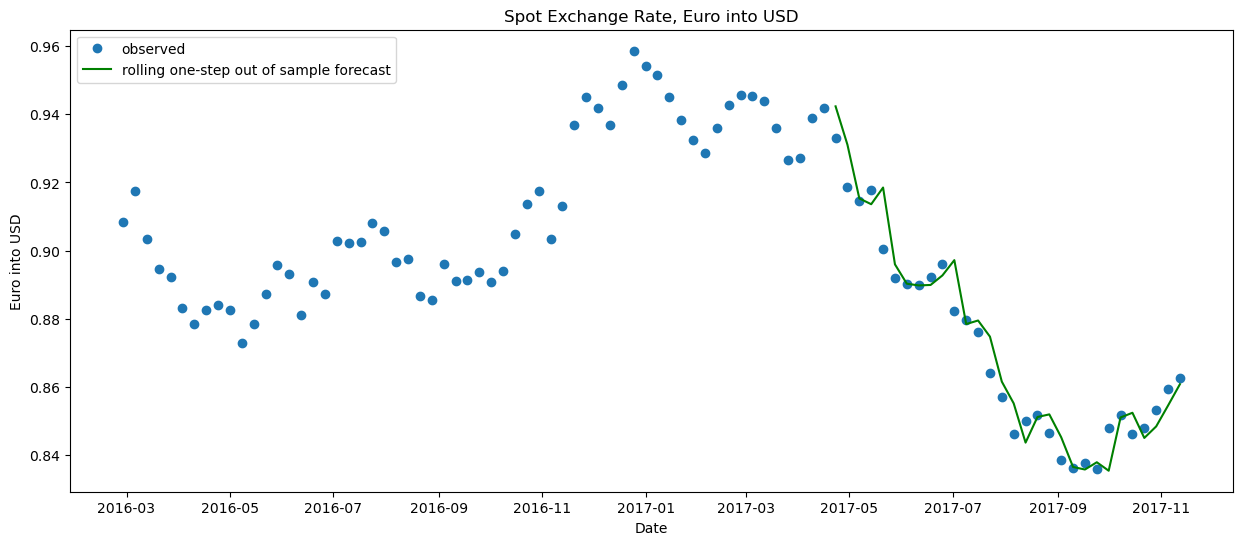

In [136]:
fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD',xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_week[-90:],'o', label='observed')
ax.plot(np.exp(predictions_series),'g',label = "rolling one-step out of sample forecast")
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')